# Assignment Objectives

In [ ]:
#Provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: 
#BBC, CBS, CNN, Fox, and New York times.

#Import tweepy, pandas, matplotlib, seaborn, textblob, vader

#First plot will:
    #be a scatter plot of sentiments of last 100 tweets
    #Ranging from -1.0 to 1.0
    #Scores of 0 is neutral sentiment
    # -1 most negative sentiment
    # +1 most positive sentiment
    #Each plot point will reflect the compound sentiment of a tweet
    #Sort each plot by a relative timestamp

#Second plot will:
    #be a bar plot visualizing OVERALL sentiments of last 100 tweets per org.
    # Aggregate using VADER

#Final must:
    # Pull last 100 tweets per outlet
    #Perform sentiment analysis: Compound, Positive, Neutral, Negative score per tweet
    #Pull into a DataFrame the tweet's source account, it's text, date, sentiment scores
    #Export the data from DataFrame into a CSV File
    #Save png images per plot

#Final Considerations:
    #Use Matplotlib & Seaborn libraries
    #Include a description of 3 observable trends
    #Proper labeling of plots (titles, with date of analysis) and axes lables
    #Exported markdown version of notebook called README.md in GitHub

# Observable Trends:
### 1: The scatter plot, although shows frequency of posts, makes for difficult sentiment analysis.  From the "Eye" Test, it seems as though all news outlets are evenly distributed among the sentiment analysis, but upon examining the bar graphs, we clearly see, based on the mean, where each media outlet favors.
### 2: The NYT where the only media group with a sentiment average of over 1 or positive on the sentiment scale.  Other outlets post positive tweets, but just from the "Eye" test, this shows the other major media outlets have scores favoring neutral to negative.
### 3: After looking at the graphs, I examined the Twitter accounts for popularity.  I discovered the two most popular outlets (CNN and NYTimes) with over 40 million followers, are also the only new outlets that have a mean score of positive in the sentiment analysis.  The other three favor neutral or negative.  This raises multiple questions worth examining, such as are these two most popular because they are positive?  Are other political or news media outlets favoring positive sentiments or negative?  How many followers for the positive scoring media outlets also follow the negative scoring?  Again, the going by an "Eye" test allows for quick trend analysis and also invited deeper examintations.

# Dependencies/Api Retrieval

In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import json
import numpy as np
from pprint import pprint
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "vbtDKBb6MLz1UDuXqjulinZWP"
consumer_secret = "porfKt9UTtSp2XRYfqT7W5CaLAsgTFgXAgsjFYaAyxc42asmnw"
access_token = "2503131714-U09cIrTKKguHgX4tLYxSIWFKqkpM3FCpko8huUm"
access_token_secret = "QT9zEyQXvVzObM46BrIsx9kgqnwmZmhUjtNhafPU3iGcB"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Skeleton

In [3]:
#Target User Accounts
user_list = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

#Assign Variables to hold sentiments for analysis
source_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_list = []
dates_list = []
sentiments_dict = []
counter = 1

#Create a loop through all parts of user_list
for user in user_list:
    #Create a loop that evaulates 100 tweets (5 pages)
    for x in range(5):

        #Get all tweets from their home feed
        public_tweets = api.user_timeline(user)
        
        #Loop through all the tweets
        for tweet in public_tweets:
            #Use vader analysis for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            twe = tweet["text"]
            dte = tweet["created_at"]
            tweets_ago = counter
    #Add each sentiment value to the corresponding list:
            source_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_list.append(twe)
            dates_list.append(dte)
            
            
            #Append vader sentiment dict
            sentiments_dict.append({"Account": user,
                          "Created Date": dte,
                          #"Date": tweet["created_at"], 
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                          "Tweets Ago": tweets_ago,
                          "Tweet Text": twe})
            #Insert coutmter
            counter = counter + 1
    #Add each sentiment value to the corresponding list:
    # compound_list.append(compound)
    # positive_list.append(pos)
    # negative_list.append(neg)
    # neutral_list.append(neu)
    # tweet_list.append(twe)
    # dates_list.append(dte)

    #Print the averages
    print("Sentiment Scores")
    print("---------------------------")
    # pprint(bbc_tweets)
    print("User: %s" % user)
    print("Compound Score: %s" % np.mean(compound_list))
    print("Positive Score: %s" % np.mean(positive_list))
    print("Neutral Score: %s" % np.mean(neutral_list))
    print("Negative Score: %s" % np.mean(negative_list))
    print("---------------------------")
    print("End of Scores")
    print("---------------------------")



Sentiment Scores
---------------------------
User: @BBCWorld
Compound Score: -0.064255
Positive Score: 0.0541
Neutral Score: 0.83125
Negative Score: 0.1147
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @CBSNews
Compound Score: -0.056725
Positive Score: 0.0614
Neutral Score: 0.8328
Negative Score: 0.10585
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @CNN
Compound Score: -0.02466
Positive Score: 0.0607833333333
Neutral Score: 0.8539
Negative Score: 0.08535
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @FoxNews
Compound Score: -0.021605
Positive Score: 0.0516125
Neutral Score: 0.8757125
Negative Score: 0.0727
---------------------------
End of Scores
---------------------------
Sentiment Scores
---------------------------
User: @nytimes
Compound Score: 0.006715
Posit

# Network Twitter Sentiments DataFrame

In [4]:
user_df = pd.DataFrame(sentiments_dict)
user_df.head()
#Export to csv
user_df.to_csv("Distinguishing_Sentiments.csv")

In [19]:
user_list = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
#Separate each list item into a separate df

#BBC
bbc_df = user_df[user_df["Account"] == "@BBCWorld"]
#CBS
cbs_df = user_df[user_df["Account"] == "@CBSNews"]
#CNN
cnn_df = user_df[user_df["Account"] == "@CNN"]
#FOX
fox_df = user_df[user_df["Account"] == "@FoxNews"]
#NYT
nyt_df = user_df[user_df["Account"] == "@nytimes"]
#Print Statements of Media DF
print(bbc_df.head())
print("-" * 80)
print(cbs_df.head())
print("-" * 80)
print(cnn_df.head())
print("-" * 80)
print(fox_df.head())
print("-" * 80)
print(nyt_df.head())
print("-" * 80)

     Account  Compound                    Created Date  Negative  Neutral  \
0  @BBCWorld   -0.4939  Wed Apr 18 03:48:34 +0000 2018      0.39     0.61   
1  @BBCWorld    0.0000  Wed Apr 18 03:25:32 +0000 2018      0.00     1.00   
2  @BBCWorld   -0.5994  Wed Apr 18 02:39:42 +0000 2018      0.45     0.55   
3  @BBCWorld    0.5719  Wed Apr 18 01:45:00 +0000 2018      0.00     0.73   
4  @BBCWorld    0.0000  Wed Apr 18 01:38:00 +0000 2018      0.00     1.00   

   Positive                                         Tweet Text  Tweets Ago  
0      0.00  Malaria experts fear disease's resurgence http...           1  
1      0.00  RT @samanthaTVnews: As #starbucks prepares to ...           2  
2      0.00  Australian surf event cancelled after shark at...           3  
3      0.27  RT @BBCNewsAsia: Jessie J has won China's vers...           4  
4      0.00  CIA director Mike Pompeo travelled to Pyongyan...           5  
---------------------------------------------------------------------------

In [6]:
#Formatting Date
dates = dt.date.today
dates = dt.date.today().strftime("%m/%d/%Y")
dates

'04/17/2018'

# Scatter Plot Sentiment
## Plot 1 Company at a Time (5 Plots) Before combining
### Refer to Citipy Scatter plot

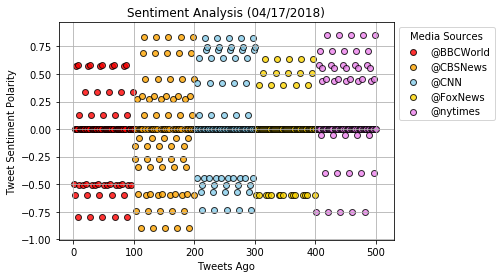

In [7]:
#Bubble Plot
plt.scatter(x=bbc_df["Tweets Ago"],
            y=bbc_df["Compound"],
            facecolors="red",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="BBC")

plt.scatter(x=cbs_df["Tweets Ago"],
            y=cbs_df["Compound"],
            facecolors="orange",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="CBS")

plt.scatter(x=cnn_df["Tweets Ago"],
            y=cnn_df["Compound"], 
            facecolors="skyblue",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8, 
            label="CNN")

plt.scatter(x=fox_df["Tweets Ago"],
            y=fox_df["Compound"], 
            facecolors="gold",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8,
            label="FOX")

plt.scatter(x=nyt_df["Tweets Ago"],
            y=nyt_df["Compound"],
            facecolors="violet",
            edgecolor="black", 
            linewidth=1, 
            marker='o',
            alpha=0.8, 
            label="NYT")

#Scatter Properties
plt.title("Sentiment Analysis ("+ dates + ")")
plt.ylabel("Tweet Sentiment Polarity")
plt.xlabel("Tweets Ago")
#Create a Legend
plt.legend(("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"), 
           numpoints=1, loc="upper right", ncol=1, fontsize=8,
           title="Media Sources", fancybox=True)
#Have legend adjacent to plot
legn = plt.legend(("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"), 
                  bbox_to_anchor =(1,1), title="Media Sources")

plt.savefig("Distinguishing_Sentiment_scatter_plot.png")
plt.grid()
plt.show()


# Bar Graph of Overall Sentiments

In [8]:
#Second plot will:
    #be a bar plot visualizing OVERALL sentiments of last 100 tweets per org.
    # Aggregate using VADER
avg_score = round(user_df.groupby(["Account"]).mean()["Compound"],2)
avgSent_df = pd.DataFrame(avg_score)
avg_score.head()

Account
@BBCWorld   -0.06
@CBSNews    -0.05
@CNN         0.04
@FoxNews    -0.01
@nytimes     0.12
Name: Compound, dtype: float64

In [9]:
#Set value for x-axis and tick_locations
x_axis = np.arange(len(avg_score))
xlabels = avg_score.index
# tick_locations = [value + 0.4 for value in x_axis]
count=0
#Loop for ploting average scores
for sentiment in avg_score:
    plt.text(count, compound + 0.1, str(round(compound,2)))
    count = count + 1

In [10]:
#List where to write x labels and adjust figure size to fit
plt.bar(x_axis, avg_score, tick_label = xlabels, color= ["red", "orange", "skyblue", "gold", "violet"], align="edge")

<Container object of 5 artists>

In [11]:
#Set X and Y Limits:
plt.xlim(-0.25, len(x_axis))

(-0.25, 5)

In [12]:
#Set Title and Labels
plt.title("Twitter Sentiment Analysis (" + dates + ")")
plt.grid()
plt.xlabel("Media Sources")
plt.ylabel("Sentiment Score")

Text(0,0.5,'Sentiment Score')

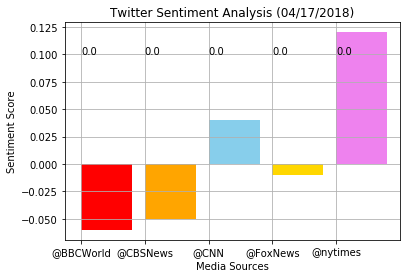

In [13]:
#Save our graph and show
plt.savefig("Sentiment_Bar_Scores.png")
plt.show()